In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# import utils and basic libraries
from utils.preprocessing import load_dataset,select_T_images,register_dataset,augment_dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [119]:
from utils.preprocessing import load_dataset_2

In [102]:
#-------------
# Settings
#-------------
T = 9                                   # number of temporal dimension
n_augment = 6                           # number of temporal permutations to augment the dataset
dataset_dir = 'maupiti'                 # input dir (train val and test splitted)
dataset_output_dir = 'dataset_maupiti'  # output dir
threshold_clean = 0.85                  # percentage of clear pixel
train_full = False                      # train without a validation

<a id="loading"></a>
# 1.0 Dataset Loading

In [149]:
# test loading
X_RED_test, X_RED_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="RED")
X_NIR_test, X_NIR_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="NIR")

print(f"Test RED scenes: {len(X_RED_test)}")
print(f"Test NIR scenes: {len(X_NIR_test)}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test RED scenes: 1
Test NIR scenes: 1


In [150]:
# test loading
X_BLUE_test, X_BLUE_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="BLUE")
X_GREEN_test, X_GREEN_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="GREEN")

print(f"Test BLUE scenes: {len(X_BLUE_test)}")
print(f"Test GREEN scenes: {len(X_GREEN_test)}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test BLUE scenes: 1
Test GREEN scenes: 1


<a id="preprocessing"></a>
# 2.0 Dataset Pre-Processing

## 2.1 Register dataset

In [151]:
# test registration
X_RED_test, X_RED_test_masks = register_dataset(X_RED_test, X_RED_test_masks)
X_NIR_test, X_NIR_test_masks = register_dataset(X_NIR_test, X_NIR_test_masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [152]:
# test registration
X_BLUE_test, X_BLUE_test_masks = register_dataset(X_BLUE_test, X_BLUE_test_masks)
X_GREEN_test, X_GREEN_test_masks = register_dataset(X_GREEN_test, X_GREEN_test_masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

## 2.2 Select the best T LR images

In [153]:
# select T test
X_RED_test, _ = select_T_images(X_RED_test, X_RED_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can't remove scenes from testing dataset
X_NIR_test, _ = select_T_images(X_NIR_test, X_NIR_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T
print(f"Test RED shape: {X_RED_test.shape}")
print(f"Test NIR shape: {X_NIR_test.shape}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test RED shape: (1, 128, 128, 9)
Test NIR shape: (1, 128, 128, 9)


In [154]:
# select T test
X_BLUE_test, _ = select_T_images(X_BLUE_test, X_BLUE_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can't remove scenes from testing dataset
X_GREEN_test, _ = select_T_images(X_GREEN_test, X_GREEN_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T
print(f"Test BLUE shape: {X_BLUE_test.shape}")
print(f"Test GREEN shape: {X_GREEN_test.shape}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test BLUE shape: (1, 128, 128, 9)
Test GREEN shape: (1, 128, 128, 9)


<a id="save"></a>
# 3.0 Save dataset

In [155]:
if not os.path.isdir(dataset_output_dir):
    os.mkdir(dataset_output_dir)

In [156]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_RED_test.npy'), X_RED_test)
np.save(os.path.join(dataset_output_dir, 'X_NIR_test.npy'), X_NIR_test)

In [157]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_BLUE_test.npy'), X_BLUE_test)
np.save(os.path.join(dataset_output_dir, 'X_GREEN_test.npy'), X_GREEN_test)

# Display the images

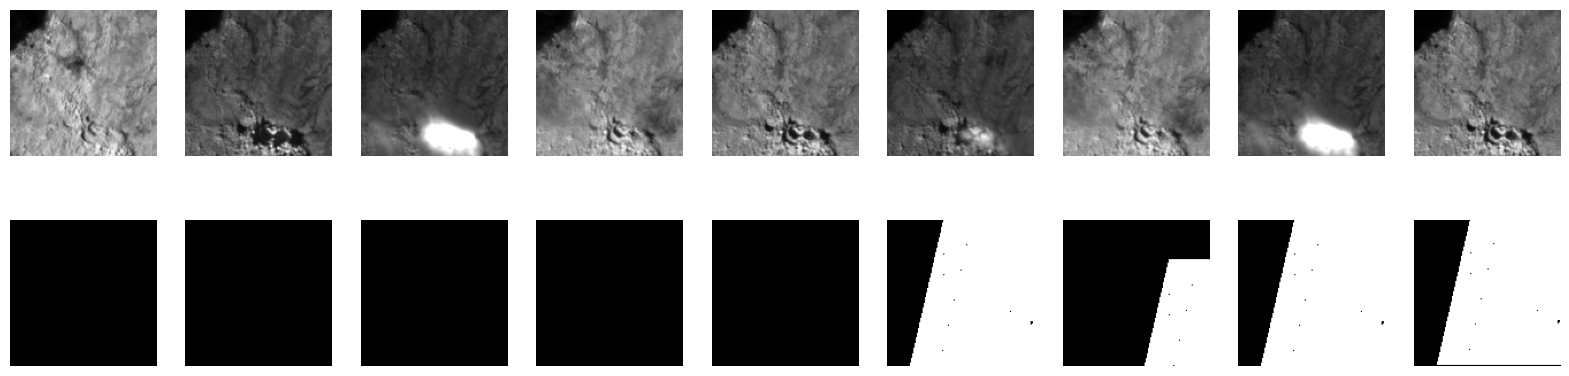

In [162]:
fig, ax = plt.subplots(2, T, figsize=(20,5))

for i in range(T):
    ax[0,i].imshow(X_NIR_test[index][...,i], cmap = 'gray')
    ax[0,i].axis('off')
    ax[1,i].imshow(X_NIR_test_masks[index][...,i], cmap = 'gray')
    ax[1,i].axis('off')


In [101]:
np.load('maupiti/test/NIR/imgset01/clearance.npy')

array([4177920, 4177920, 4177920, 4177920, 4177920, 3050055, 4176645,
       4176645, 4177155, 4177920, 3989985, 4177920, 4177920, 4177920,
       4177920, 3914760, 4170270, 3723765], dtype=uint64)